In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

# Load the data
# 'papers' is currently not being used in this code
papers = pd.read_csv('database_clean.csv')
embeddings_df = pd.read_csv("use_embeddings.csv")

embeddings_df_clean = embeddings_df.drop(columns=["Id"])

embeddings = embeddings_df_clean.values

# train 70%, val 20%, test 10%
X_train, X_temp = train_test_split(embeddings, test_size=0.3, random_state=42)
X_val, X_test = train_test_split(X_temp, test_size=1/3, random_state=42)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

Train: (385, 512), Validation: (110, 512), Test: (56, 512)


In [25]:
print(embeddings_df)

            0         1         2         3         4         5         6  \
0   -0.021710 -0.060565 -0.049472  0.027785  0.026220 -0.050394 -0.059057   
1   -0.007026  0.005963 -0.018330 -0.035518 -0.053948  0.053736 -0.018253   
2    0.020690 -0.033127  0.025997 -0.047066  0.041261  0.009696  0.058546   
3    0.005473 -0.008871  0.018008 -0.002115  0.053201 -0.005545  0.031782   
4   -0.059352 -0.028049 -0.020025 -0.064446 -0.018527 -0.026706  0.027036   
..        ...       ...       ...       ...       ...       ...       ...   
546 -0.064924 -0.065529 -0.058844 -0.039948 -0.050677 -0.046829 -0.007409   
547 -0.036761  0.040283 -0.046833 -0.010197  0.060327 -0.057649  0.051071   
548 -0.016511 -0.011313 -0.039614 -0.055246 -0.000493  0.051430  0.028284   
549 -0.051699 -0.058573 -0.052775 -0.058332  0.017621 -0.020486 -0.011806   
550 -0.035791 -0.031972 -0.026651 -0.062158  0.011058 -0.006583 -0.047521   

            7         8         9  ...       503       504       505  \
0  

In [3]:
# Since the dataset is very small, the autodecoder model must be simple to reduce overfitting.
input_dim = X_train.shape[1]  

encoder = keras.Sequential([
    layers.InputLayer(input_shape=(input_dim,)),
    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
])

decoder = keras.Sequential([
    layers.Dense(input_dim, activation="sigmoid")  
])

input_layer = layers.Input(shape=(input_dim,))
encoded = encoder(input_layer)
decoded = decoder(encoded)

autoencoder = keras.Model(input_layer, decoded)
# To reduce overfitting
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
autoencoder.compile(optimizer=optimizer, loss="mse")

autoencoder.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 512)            │        33,280 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,112 (258.25 KB)

 Trainable params: 66,112 (258.25 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = autoencoder.fit(
    X_train, X_train,
    epochs= 50,
    batch_size=32,
    validation_data=(X_val, X_val),
    shuffle=True
)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3736 - val_loss: 1.3409
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3303 - val_loss: 1.2987
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2886 - val_loss: 1.2579
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2479 - val_loss: 1.2185
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2090 - val_loss: 1.1805
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1713 - val_loss: 1.1438
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1348 - val_loss: 1.1083
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0997 - val_loss: 1.0740
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0656 - val_loss: 1.0409
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0327 - val_loss: 1.0088
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0009 - val_loss: 0.9777
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9701 - val_lo

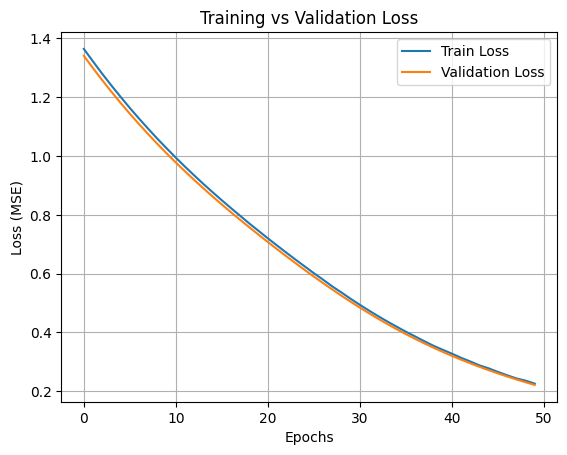

In [5]:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid()
plt.show()

In [6]:
# Evaluate how well the autoencoder model encodes
from sklearn.metrics import mean_squared_error

reconstructed_test = autoencoder.predict(X_test)

mse = mean_squared_error(X_test, reconstructed_test)

# MSE for test is much smaller than MSE for loss and val_loss. Why?
print(f"Mean Squared Error (MSE) on the test set: {mse:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Mean Squared Error (MSE) on the test set: 0.0613


In [7]:
# Encode the train and test set using the autoencoder's encoder
encoded_train = encoder.predict(X_train)
encoded_test = encoder.predict(X_test)

# Calculate the similarity matrix for both the original and encoded versions
similarity_matrix = cosine_similarity(X_test, X_train)
similarity_matrix_encoded = cosine_similarity(encoded_test, encoded_train)

# Sort the similarity matrix in reverse order and select the top 10 data points
top_n = 10
top_indices = np.argsort(-similarity_matrix_encoded, axis=1)[:, :top_n]  

# Print and store the id of the recommended papers
recommended_paper_ids = []

for i, test_idx in enumerate(top_indices):
    recommended_for_test = []
    print(f"\nTest Paper {i+1}:")
    for j, train_idx in enumerate(test_idx):
        recommended_paper_id = papers.iloc[train_idx]["Id"]
        recommended_for_test.append(recommended_paper_id)
        print(f"  {j+1}. Recommended Paper ID: {recommended_paper_id} (Encoded_Similarity: {similarity_matrix_encoded[i, train_idx]:.4f}) (Similarity: {similarity_matrix[i, train_idx]:.4f})")
    recommended_paper_ids.append(recommended_for_test)

# Sort the similarity matrix in reverse order and select the top 10 data points
top_n = 10
top_indices = np.argsort(-similarity_matrix, axis=1)[:, :top_n]  

# Print and store the id of the recommended papers
best_paper_ids = []

for i, test_idx in enumerate(top_indices):
    best_for_test = []
    print(f"\nTest Paper {i+1}:")
    for j, train_idx in enumerate(test_idx):
        best_paper_id = papers.iloc[train_idx]["Id"]
        best_for_test.append(best_paper_id)
        print(f"  {j+1}. Unencoded Recommended Paper ID: {best_paper_id} (Similarity: {similarity_matrix[i, train_idx]:.4f}) (Encoded_Similarity: {similarity_matrix_encoded[i, train_idx]:.4f})")
    best_paper_ids.append(best_for_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step

Test Paper 1:
  1. Recommended Paper ID: 190 (Encoded_Similarity: 0.9975) (Similarity: 0.5902)
  2. Recommended Paper ID: 121 (Encoded_Similarity: 0.9974) (Similarity: 0.5899)
  3. Recommended Paper ID: 307 (Encoded_Similarity: 0.9972) (Similarity: 0.5357)
  4. Recommended Paper ID: 374 (Encoded_Similarity: 0.9972) (Similarity: 0.5925)
  5. Recommended Paper ID: 333 (Encoded_Similarity: 0.9971) (Similarity: 0.6285)
  6. Recommended Paper ID: 227 (Encoded_Similarity: 0.9971) (Similarity: 0.5800)
  7. Recommended Paper ID: 330 (Encoded_Similarity: 0.9971) (Similarity: 0.6709)
  8. Recommended Paper ID: 5 (Encoded_Similarity: 0.9970) (Similarity: 0.6476)
  9. Recommended Paper ID: 134 (Encoded_Similarity: 0.9969) (Similarity: 0.5563)
  10. Recommended Paper ID: 381 (Encoded_Similarity: 0.9969) (Similarity: 0.6253)

Test Paper 2:
  1. Recommended Paper ID: 146 (Encoded_Similarity: 0.9967) (Similarity: 0.5861)
 

In [9]:
# Calculates the percentages of how many recommended papers using the autoencoder exist in the recommended papers without using the autoencoder for each test paper
overlap_percentages = []

for recommended, best in zip(recommended_paper_ids, best_paper_ids):
    recommended_set = set(recommended)
    best_set = set(best)
    
    intersection = recommended_set.intersection(best_set)
    
    overlap_percentage = len(intersection) / len(best_set) * 100
    
    overlap_percentages.append(overlap_percentage)

average_overlap = sum(overlap_percentages) / len(overlap_percentages)

for i, overlap in enumerate(overlap_percentages):
    print(f"Test Paper {i+1}: {overlap:.2f}% overlap")

# Calculates the average overlap percentage for all test papers
print(f"\nAverage overlap: {average_overlap:.2f}%")

Test Paper 1: 40.00% overlap
Test Paper 2: 40.00% overlap
Test Paper 3: 20.00% overlap
Test Paper 4: 30.00% overlap
Test Paper 5: 60.00% overlap
Test Paper 6: 30.00% overlap
Test Paper 7: 10.00% overlap
Test Paper 8: 50.00% overlap
Test Paper 9: 40.00% overlap
Test Paper 10: 20.00% overlap
Test Paper 11: 60.00% overlap
Test Paper 12: 40.00% overlap
Test Paper 13: 50.00% overlap
Test Paper 14: 40.00% overlap
Test Paper 15: 30.00% overlap
Test Paper 16: 60.00% overlap
Test Paper 17: 40.00% overlap
Test Paper 18: 20.00% overlap
Test Paper 19: 30.00% overlap
Test Paper 20: 50.00% overlap
Test Paper 21: 30.00% overlap
Test Paper 22: 70.00% overlap
Test Paper 23: 40.00% overlap
Test Paper 24: 40.00% overlap
Test Paper 25: 60.00% overlap
Test Paper 26: 50.00% overlap
Test Paper 27: 20.00% overlap
Test Paper 28: 40.00% overlap
Test Paper 29: 60.00% overlap
Test Paper 30: 50.00% overlap
Test Paper 31: 40.00% overlap
Test Paper 32: 30.00% overlap
Test Paper 33: 60.00% overlap
Test Paper 34: 50.0

In [10]:
# Saves the model
autoencoder.save('autoencoder_model.keras')